In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta
import seaborn as sns

from global_config import config

data_dir      = config.get_property('covid_fb')
geo_dir       = config.get_property('geo_dir')
results_dir   = config.get_property('results_dir')


In [2]:
# Loads the rt
df_rt = pd.read_csv( os.path.join(results_dir, 'rt_merged_all.csv'),  parse_dates = ['date'])
df_rt['poly_id'] = df_rt.region.apply(lambda s: s.lower().replace('í','i').replace('ó','o').replace('á','a').replace('é','e').replace('ñ','n').replace(' ','_'))
df_rt.sample(10)

Unnamed: 0       date    median      mean  lower_90  lower_50  lower_20  \
4472         216 2020-10-15  1.029662  1.032700  0.976307  1.008069  1.022003   
111          111 2020-07-13  1.055847  1.053716  0.997120  1.032988  1.047955   
2859         107 2020-07-13  1.086722  1.090300  1.035029  1.065278  1.078801   
4465         209 2020-10-08  1.013620  1.014287  0.959775  0.992370  1.005594   
1789         267 2020-12-02  1.095467  1.096037  1.041309  1.073026  1.087159   
1053         147 2020-08-07  0.873525  0.873669  0.812451  0.852195  0.865791   
3539         189 2020-09-22  0.963872  0.963014  0.916926  0.945094  0.956534   
4053          97 2020-06-27  1.201377  1.202440  1.149866  1.178764  1.192222   
4814         249 2020-11-17  1.054353  1.058416  1.001234  1.030456  1.044499   
3600         250 2020-11-22  1.076917  1.078150  1.032632  1.057651  1.069320   

      upper_20  upper_50  upper_90              region  region_id  \
4472  1.038765  1.055947  1.096718                Suba         11   
111   1.063427  1.075231  1.105824      Antonio Nariño         15   
2859  1.096678  1.112290  1.153377        Los Mártires         14   
4465  1.021598  1.035914  1.071778                Suba         11   
1789  1.104164  1.117743  1.154300            Engativá         10   
1053  0.882363  0.896434  0.930564           Chapinero          2   
3539  0.970145  0.981104  1.007836  Rafael Uribe Uribe         18   
4053  1.209089  1.222473  1.263565            Santa Fe          3   
4814  1.063823  1.081840  1.128060         Teusaquillo         13   
3600  1.084093  1.097220  1.127606  Rafael Uribe Uribe         18   

                 poly_id  
4472                suba  
111       antonio_narino  
2859        los_martires  
4465                suba  
1789            engativa  
1053           chapinero  
3539  rafael_uribe_uribe  
4053            santa_fe  
4814         teusaquillo  
3600  rafael_uribe_uribe

In [26]:
df_movement = pd.read_csv(os.path.join(results_dir,'data', 'movement_fb','movement.csv'), parse_dates = ['date_time'])



date_time  start_poly_id  end_poly_id  movement
0      2020-04-12     1100111105   1100111105     17251
1      2020-04-12     1100111105   1100111109       113
2      2020-04-12     1100111105   1100111318       102
3      2020-04-12     1100111105   1100111401        58
4      2020-04-12     1100111105   1100112535       185
...           ...            ...          ...       ...
689133 2020-12-22     1100119217   1100119114        77
689134 2020-12-22     1100119217   1100119202       264
689135 2020-12-22     1100119217   1100119212       225
689136 2020-12-22     1100119217   1100119216       358
689137 2020-12-22     1100119217   1100119217     13892

[689138 rows x 4 columns]

In [74]:
def read_geo_df(path_to_geodf):
    df_geo = pd.read_csv(path_to_geodf)
    df_geo['geometry'] = df_geo['geometry'].apply(wkt.loads)
    df_geo = gpd.GeoDataFrame(df_geo, geometry='geometry')
    return df_geo

In [79]:
from shapely.geometry import Point, LineString
from shapely.ops import cascaded_union

from datetime import timedelta
import contextily as ctx

import geopandas as gpd
from shapely import wkt

movement_manz_df = pd.read_csv(  os.path.join(data_dir, 'agglomerated', 'geometry (sectores)', 'movement.csv'), parse_dates = ['date_time'])
sec_poly_df      = read_geo_df( os.path.join(data_dir, 'agglomerated', 'geometry (sectores)', 'polygons.csv' )  )

loc_poly_df      = read_geo_df( os.path.join(data_dir, 'agglomerated', 'geometry', 'polygons.csv')  )

sec_poly_df      = sec_poly_df[["poly_id", "poly_name", "attr_population",	"attr_area", "geometry"]]
loc_poly_df      = loc_poly_df[["poly_id", "poly_name", "geometry"]]


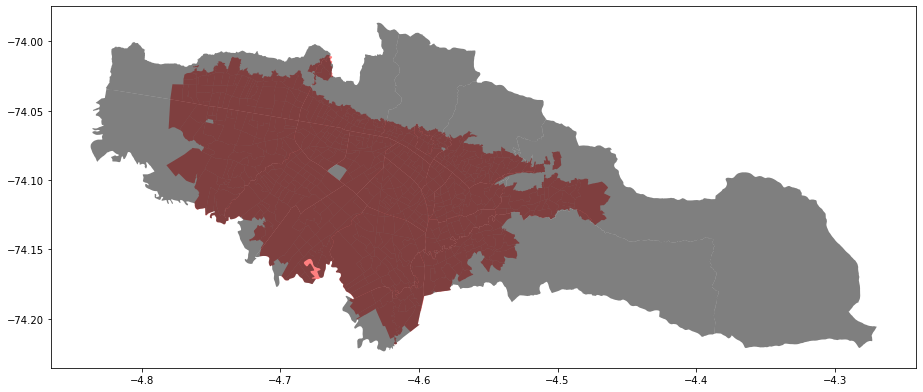

In [90]:
from matplotlib import transforms
fig, ax = plt.subplots(1, 1, figsize=(15.5, 15.2))

base = ax.figure.gca().transData
rot = transforms.Affine2D().rotate_deg(90)


sec_poly_df.plot(ax=ax, alpha=0.5, color='r', transform= rot + base)
loc_poly_df.plot(ax=ax, alpha=0.5, color='k', transform= rot + base)
plt.show()

In [96]:
df_movement_localities.start_poly_id.unique()

array(['barrios_unidos', 'bosa', 'chapinero', 'ciudad_bolivar',
       'engativa', 'fontibon', 'kennedy', 'los_martires', 'puente_aranda',
       'rafael_uribe_uribe', 'san_cristobal', 'santa_fe', 'suba',
       'teusaquillo', 'tunjuelito', 'usaquen', 'usme'], dtype=object)

In [111]:
dict_correct = {'Los Martires': 'Los Mártires', 'Fontibon': 'Fontibón', 'Engativa': 'Engativá',
                            'San Cristobal': 'San Cristóbal', 'Usaquen': 'Usaquén',
                            'Ciudad Bolivar': 'Ciudad Bolívar', 'Candelaria': 'La Candelaria'}
                            

# read and rename localities
df_movement_localities = pd.read_csv(os.path.join(results_dir,'data', 'movement_fb_locality','movement.csv'), parse_dates = ['date_time'])
df_movement_localities["start_poly_id"] = df_movement_localities.start_poly_id.apply(lambda s: ' '.join( [word.capitalize() for word in s.replace("colombia_bogota_localidad_","").split('_') ] ) )
df_movement_localities["end_poly_id"]   = df_movement_localities.end_poly_id.apply(lambda s:   ' '.join( [word.capitalize() for word in s.replace("colombia_bogota_localidad_","").split('_') ] ) )
df_movement_localities = df_movement_localities.replace( dict_correct )

# Creates type
df_movement_localities["movement_type"] = "External"
df_movement_localities.loc[df.start_poly_id == df.end_poly_id, "movement_type"] = "Internal"

# Consolidates dataframe
d1 = df_movement_localities.loc[df_movement_localities.movement_type == "External",['date_time','start_poly_id', 'movement','movement_type']]
d1.rename(columns= {'start_poly_id':'poly_id'}, inplace = True)

df_movement_localities 

date_time   start_poly_id     end_poly_id  movement movement_type
0     2020-04-12  Barrios Unidos  Barrios Unidos     28117      Internal
1     2020-04-12  Barrios Unidos            Bosa       144      External
2     2020-04-12  Barrios Unidos       Chapinero       133      External
3     2020-04-12  Barrios Unidos  Ciudad Bolívar        47      External
4     2020-04-12  Barrios Unidos        Engativá       488      External
...          ...             ...             ...       ...           ...
68225 2020-12-22            Usme        Santa Fe       451      External
68226 2020-12-22            Usme            Suba        15      External
68227 2020-12-22            Usme     Teusaquillo        77      External
68228 2020-12-22            Usme      Tunjuelito       170      External
68229 2020-12-22            Usme            Usme     16146      Internal

[68230 rows x 5 columns]

<AxesSubplot:xlabel='date_time', ylabel='movement'>

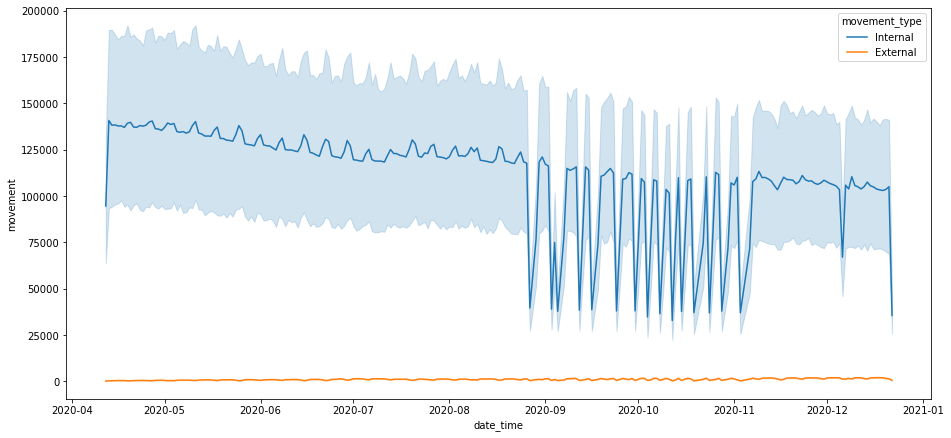

In [114]:
fig, ax = plt.subplots(2, 1, figsize=(15.5, 7.2), sharex=True)
sns.lineplot(ax=ax[0], data=df_movement_localities[df_movement_localities.movement_type='Internal'], x='date_time', y='movement', color='k')

sns.lineplot(ax=ax[1], data=df_movement_localities[df_movement_localities.movement_type='External'], x='date_time', y='movement', color='k')


In [102]:

df = pd.read_csv(os.path.join(results_dir,'data', 'movement_fb_locality','movement.csv'), parse_dates = ['date_time'])
df.start_poly_id = df.start_poly_id.apply(lambda s: s.replace("colombia_bogota_localidad_",""))
df.end_poly_id = df.end_poly_id.apply(lambda s: s.replace("colombia_bogota_localidad_",""))

# Creates type
df["movement_type"] = "External"
df.loc[df.start_poly_id == df.end_poly_id,"movement_type"] = "Internal"
df.sample(10)


# Consolidates dataframe
d1 = df.loc[df.movement_type == "External",['date_time','start_poly_id', 'movement','movement_type']]
d1.rename(columns= {'start_poly_id':'poly_id'}, inplace = True)

d2 = df.loc[df.movement_type == "External",['date_time','end_poly_id', 'movement','movement_type']]
d2.rename(columns= {'end_poly_id':'poly_id'}, inplace = True)

d3 = df.loc[df.movement_type == "Internal",['date_time','end_poly_id', 'movement','movement_type']]
d3.rename(columns= {'end_poly_id':'poly_id'}, inplace = True)

df_movement = pd.concat((d1,d2,d3), ignore_index = True)
df_movement = df_movement.groupby(['date_time','poly_id','movement_type']).sum().reset_index()
print(df_movement.poly_id.unique())





['barrios_unidos' 'bosa' 'chapinero' 'ciudad_bolivar' 'engativa'
 'fontibon' 'kennedy' 'los_martires' 'puente_aranda' 'rafael_uribe_uribe'
 'san_cristobal' 'santa_fe' 'suba' 'teusaquillo' 'tunjuelito' 'usaquen'
 'usme']


date_time         poly_id movement_type  movement
0    2020-04-12  barrios_unidos      External      2265
1    2020-04-12  barrios_unidos      Internal     28117
2    2020-04-12            bosa      External      6562
3    2020-04-12            bosa      Internal    184756
4    2020-04-12       chapinero      External      3310
...         ...             ...           ...       ...
8393 2020-12-22      tunjuelito      Internal     15514
8394 2020-12-22         usaquen      External     18440
8395 2020-12-22         usaquen      Internal     44766
8396 2020-12-22            usme      External      4412
8397 2020-12-22            usme      Internal     16146

[8398 rows x 4 columns]

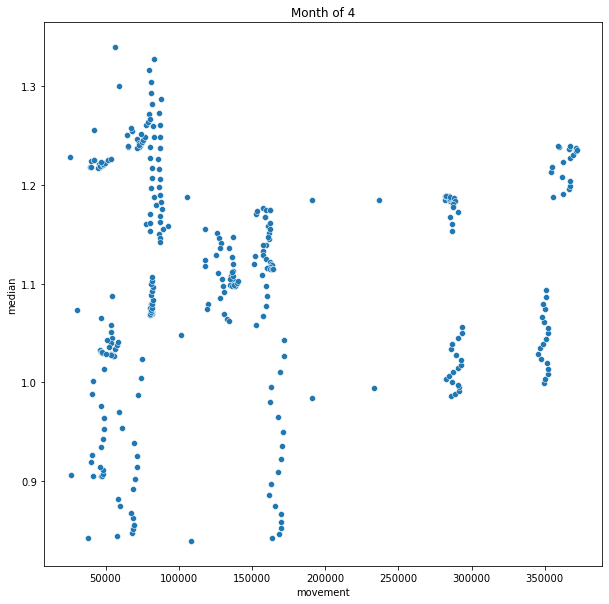

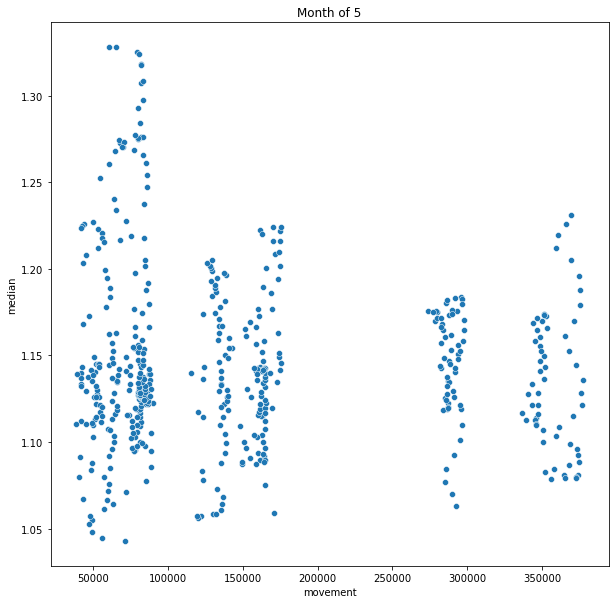

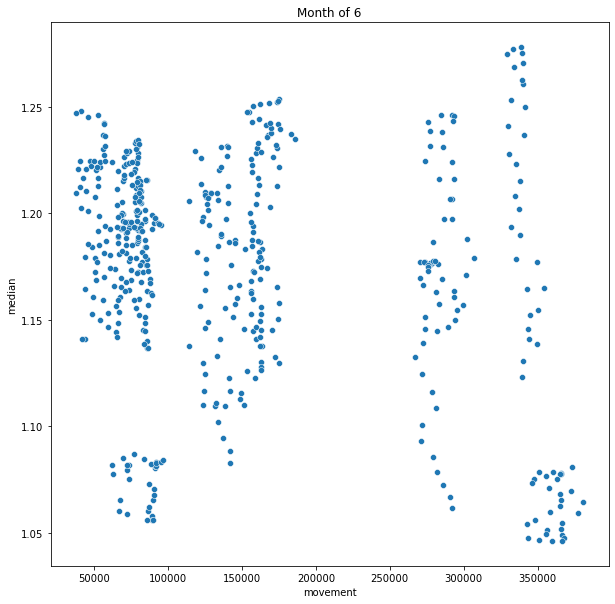

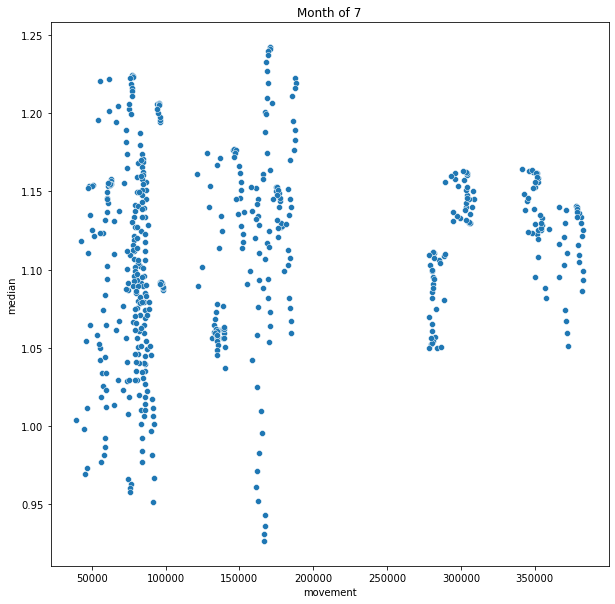

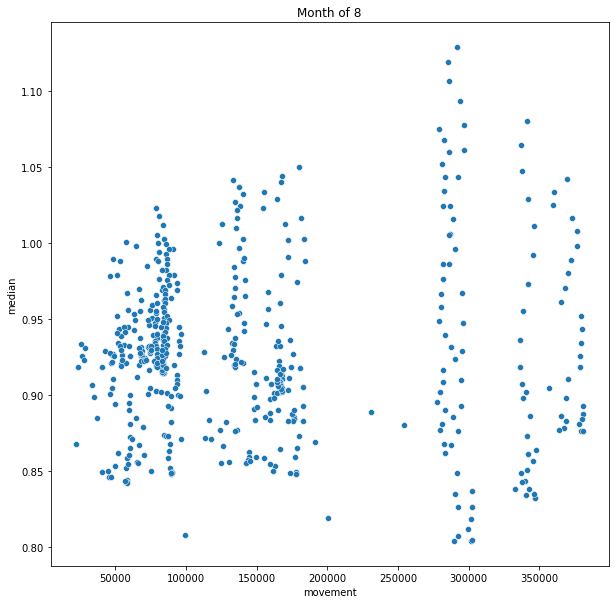

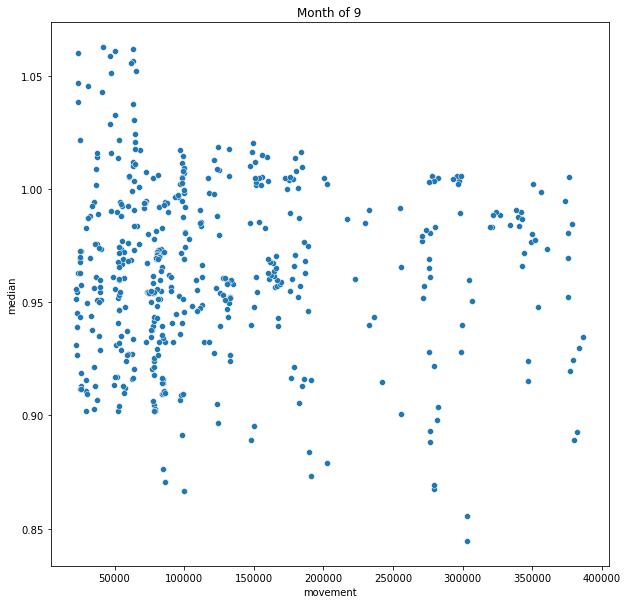

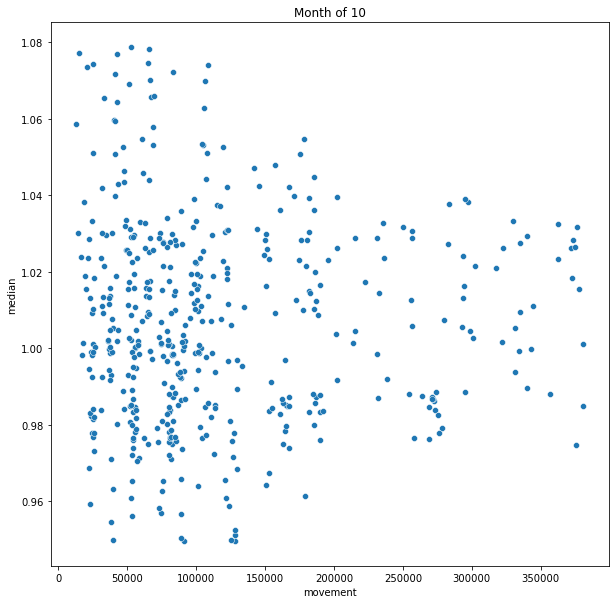

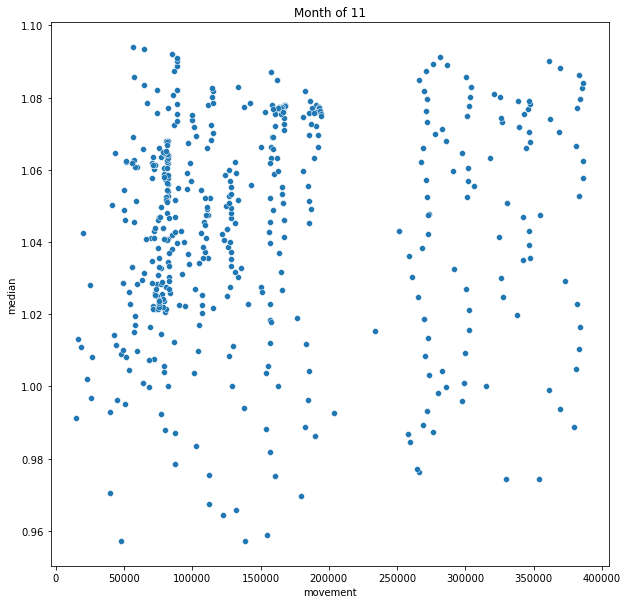

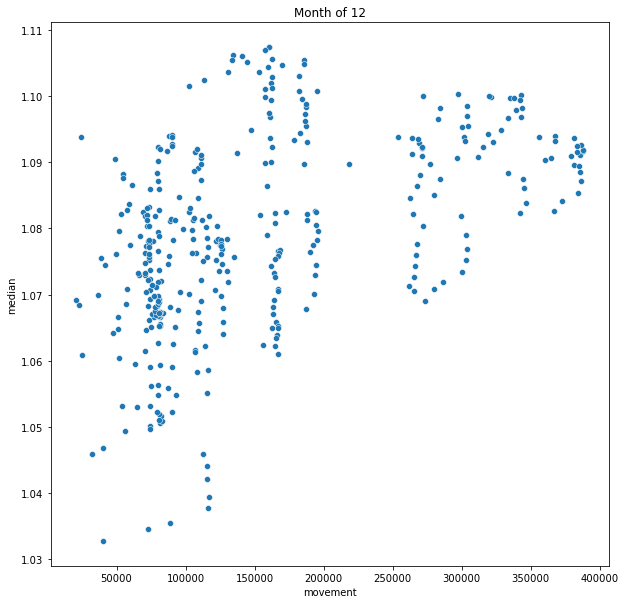

In [33]:
df_move_plot = df_movement[['date_time','poly_id','movement']].groupby(['date_time','poly_id']).sum().reset_index()
df_mov_rt = df_move_plot.merge(df_rt[["date","poly_id","median"]].rename(columns = {"date":"date_time"}), on = ["date_time","poly_id"])

df_mov_rt['month'] = df_mov_rt.date_time.apply(lambda s: s.month)

for m in df_mov_rt['month'].unique():
    df_temp = df_mov_rt[df_mov_rt.month == m].copy()
    fig=plt.figure(figsize=(10, 10), facecolor='w')
    ax = sns.scatterplot(data = df_temp, x = 'movement', y = "median")
    ax.set_title(f"Month of {m}")

In [34]:
# Defines lockdowns
no_lock_lab = "No Lockdown Imposed"
lock_lab    = "Lockdown Imposed"

# PreLockdown
pre_lockdown_start = pd.to_datetime("2020-06-20")
pre_lockdown_end = pd.to_datetime("2020-07-13")

lockdowns = []
lockdowns.append({"code":"A",
                  "start_date":"2020-07-13", 
                  "end_date":"2020-07-23", 
                  "places":["chapinero", 
                            "los_martires", 
                            "san_cristobal", 
                            "tunjuelito", 
                            "rafel_uribe_uribe", 
                            "ciudad_bolivar", 
                            "santa_fe",
                            "usme"]})


lockdowns.append({"code":"B",
                  "start_date":"2020-07-23", 
                  "end_date":"2020-08-06", 
                  "places":["bosa", 
                            "antonio_narino",
                            "kennedy",
                            "puente_aranda",
                            "fontibon"]})

lockdowns.append({"code":"C",
                  "start_date":"2020-07-31", 
                  "end_date":"2020-08-14", 
                  "places":["suba", 
                            "engativa",
                            "barrios_unidos"]})

lockdowns.append({"code":"D",
                  "start_date":"2020-08-16", 
                  "end_date":"2020-08-27", 
                  "places":["usaquen", 
                            "chapinero",
                            "santa_fe",
                            "candelaria",
                            "teusaquillo",
                           "puente_aranda",
                           "antonio_narino"]})


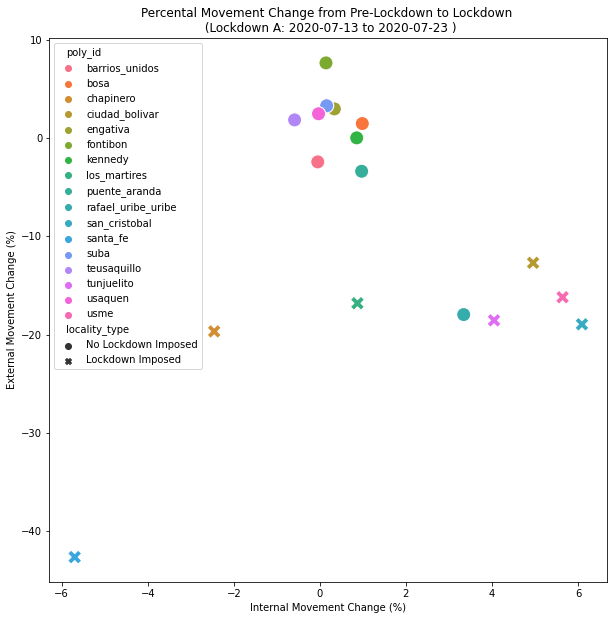

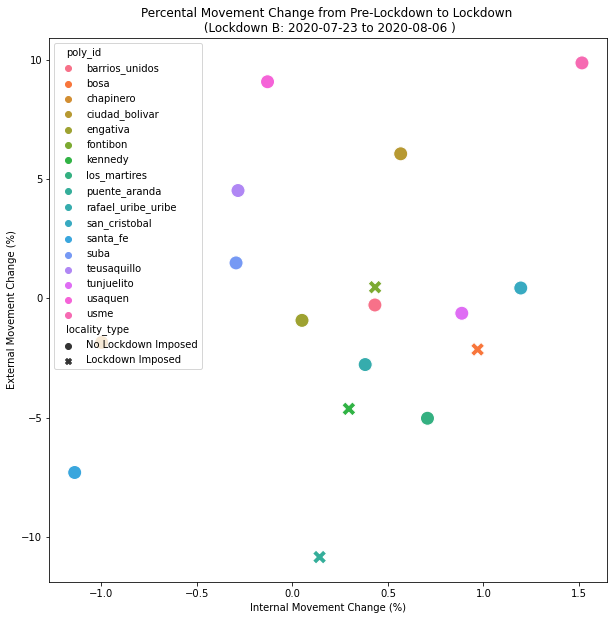

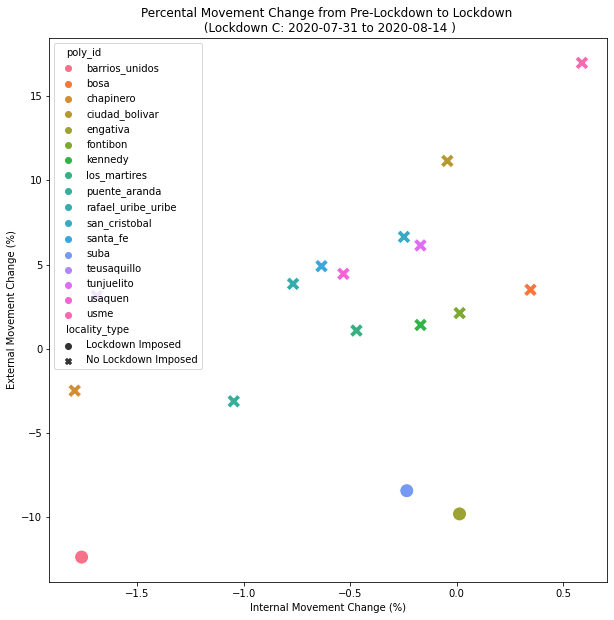

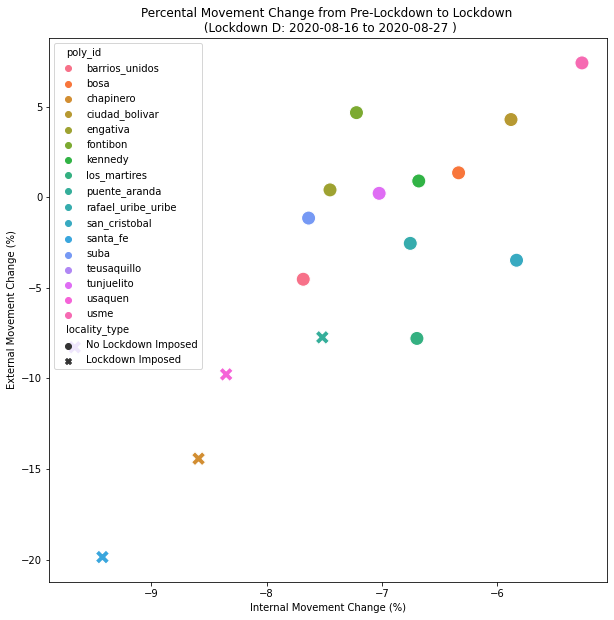

In [69]:


for lock in lockdowns:

    duration = (pd.to_datetime(lock['end_date']) - pd.to_datetime(lock['start_date'])).days

    
    lockdown_start = pd.to_datetime(lock['start_date'])
    lockdown_end = pd.to_datetime(lock['end_date'])

    # Filter by date
    df_temp = df_movement.copy()
    
    df_temp['moment'] = None
    
    # Assigns moments
    df_temp.loc[(df_movement.date_time <= pre_lockdown_end) 
                & (df_movement.date_time >= pre_lockdown_start),'moment'] = "Pre-Lockdown"

    df_temp.loc[(df_movement.date_time <= lockdown_end) 
                & (df_movement.date_time >= lockdown_start),'moment'] = "Lockdown"

    # Filters
    df_temp = df_temp[~df_temp.moment.isna()].copy()
    

    # Then by week
    df_temp = df_temp[["poly_id","moment","movement_type","movement"]].groupby(["poly_id","moment","movement_type"]).mean().reset_index()
    df_temp = df_temp.pivot_table(index = ['poly_id'], columns=["moment","movement_type"], values = ['movement']).reset_index()
    #df_temp.columns = ["poly_id",'moment',"external_movement","internal_movement"]
    
    df_temp['external_change'] = 100*(df_temp.movement.Lockdown.External -  df_temp.movement["Pre-Lockdown"].External)/df_temp.movement["Pre-Lockdown"].External
    df_temp['internal_change'] = 100*(df_temp.movement.Lockdown.Internal -  df_temp.movement["Pre-Lockdown"].Internal)/df_temp.movement["Pre-Lockdown"].Internal
    df_temp['all_change'] = 100*((df_temp.movement.Lockdown.Internal + df_temp.movement.Lockdown.External) - (df_temp.movement["Pre-Lockdown"].Internal + df_temp.movement["Pre-Lockdown"].External))/(df_temp.movement["Pre-Lockdown"].Internal + df_temp.movement["Pre-Lockdown"].External)
    df_temp['locality_type'] =  no_lock_lab
    df_temp["locality_type"] = [ int(i) * lock_lab +  (1-int(i)) * no_lock_lab for i in df_temp.poly_id.isin(lock['places']).to_list() ] 
    
    fig=plt.figure(figsize=(10, 10), facecolor='w')
    ax = sns.scatterplot(data = df_temp, 
                    x = "internal_change", 
                    y = "external_change", 
                    hue = "poly_id", 
                    style = "locality_type",
                    s = 200)

    ax.set(xlabel='Internal Movement Change (%)', ylabel='External Movement Change (%)')
    ax.set_title(f"Percental Movement Change from Pre-Lockdown to Lockdown \n (Lockdown {lock['code']}: {lock['start_date']} to {lock['end_date']} )")
    
    # Saves the dataframe
    df_temp.columns = [ "_".join(col).lower().replace("__","") for col in df_temp.columns.values ]
    df_temp.to_csv( os.path.join(results_dir, f'data/movement_clean/internal_external_lockdown_{lock["code"]}.csv') )


In [67]:
lock = lockdowns[0]

duration = (pd.to_datetime(lock['end_date']) - pd.to_datetime(lock['start_date'])).days


lockdown_start = pd.to_datetime(lock['start_date'])
lockdown_end = pd.to_datetime(lock['end_date'])

# Filter by date
df_temp = df_movement.copy()

df_temp['moment'] = None

# Assigns moments
df_temp.loc[(df_movement.date_time <= pre_lockdown_end) 
            & (df_movement.date_time >= pre_lockdown_start),'moment'] = "Pre-Lockdown"

df_temp.loc[(df_movement.date_time <= lockdown_end) 
            & (df_movement.date_time >= lockdown_start),'moment'] = "Lockdown"

# Filters
df_temp = df_temp[~df_temp.moment.isna()].copy()


# Then by week
df_temp = df_temp[["poly_id","moment","movement_type","movement"]].groupby(["poly_id","moment","movement_type"]).mean().reset_index()
df_temp = df_temp.pivot_table(index = ['poly_id'], columns=["moment","movement_type"], values = ['movement']).reset_index()
#df_temp.columns = ["poly_id",'moment',"external_movement","internal_movement"]

df_temp['external_change'] = 100*(df_temp.movement.Lockdown.External -  df_temp.movement["Pre-Lockdown"].External)/df_temp.movement["Pre-Lockdown"].External
df_temp['internal_change'] = 100*(df_temp.movement.Lockdown.Internal -  df_temp.movement["Pre-Lockdown"].Internal)/df_temp.movement["Pre-Lockdown"].Internal
df_temp['all_change'] = 100*((df_temp.movement.Lockdown.Internal + df_temp.movement.Lockdown.External) - (df_temp.movement["Pre-Lockdown"].Internal + df_temp.movement["Pre-Lockdown"].External))/(df_temp.movement["Pre-Lockdown"].Internal + df_temp.movement["Pre-Lockdown"].External)
df_temp['locality_type'] =  no_lock_lab
df_temp["locality_type"] = [ int(i) * lock_lab +  (1-int(i)) * no_lock_lab for i in df_temp.poly_id.isin(lock['places']).to_list() ] 


<ipython-input-68-bd853357cf3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.loc[ df_temp.poly_id.isin(lock['places'])]['locality_type'] = lock_lab


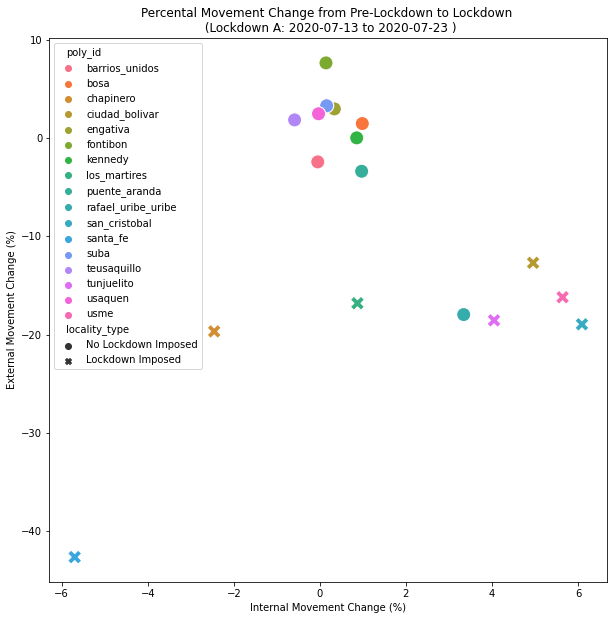

In [68]:


fig=plt.figure(figsize=(10, 10), facecolor='w')
ax = sns.scatterplot(data = df_temp, 
                x = "internal_change", 
                y = "external_change", 
                hue = "poly_id", 
                style = "locality_type",
                s = 200)

ax.set(xlabel='Internal Movement Change (%)', ylabel='External Movement Change (%)')
ax.set_title(f"Percental Movement Change from Pre-Lockdown to Lockdown \n (Lockdown {lock['code']}: {lock['start_date']} to {lock['end_date']} )")


# Saves the dataframe

df_temp.columns = [ "_".join(col).lower().replace("__","") for col in df_temp.columns.values ]
df_temp.to_csv( os.path.join(results_dir, f'data/movement_clean/internal_external_lockdown_{lock["code"]}.csv') )

In [11]:
df_temp

poly_id      movement                               \
moment                                 Lockdown                 Pre-Lockdown   
movement_type                          External       Internal      External   
0                  barrios_unidos  26156.636364   40445.545455  26804.739130   
1                            bosa  52921.636364  230366.636364  52149.347826   
2                       chapinero  26561.909091   49819.272727  33059.869565   
3                  ciudad_bolivar  22030.636364  113382.181818  25230.434783   
4                        engativa  57075.363636  243422.909091  55428.913043   
5                        fontibon  38478.454545  130677.181818  35744.782609   
6                         kennedy  78506.454545  295843.272727  78487.260870   
7                    los_martires  27888.636364   54790.727273  33518.043478   
8                   puente_aranda  41953.090909   98478.727273  43416.695652   
9              rafael_uribe_uribe  32929.454545  130194.909091  40130.695652   
10                  san_cristobal  13435.181818   72701.636364  16572.695652   
11                       santa_fe  19282.545455   33878.909091  33597.869565   
12                           suba  52100.272727  296550.000000  50441.304348   
13                    teusaquillo  20947.909091   34553.818182  20567.173913   
14                     tunjuelito  16786.727273   64832.727273  20604.956522   
15                        usaquen  33022.090909  144241.454545  32224.608696   
16                           usme   9725.363636   70201.090909  11602.956522   

                             external_change internal_change all_change  \
moment                                                                    
movement_type       Internal                                              
0               40465.043478       -2.417866       -0.048185  -0.992423   
1              228116.217391        1.480917        0.986523   1.078515   
2               51073.652174      -19.655130       -2.456021  -9.214330   
3              108027.217391      -12.682296        4.957051   1.617292   
4              242604.304348        2.970382        0.337424   0.827108   
5              130491.260870        7.647751        0.142478   1.756294   
6              293329.826087        0.024455        0.856867   0.681152   
7               54316.304348      -16.795154        0.873445  -5.868984   
8               97531.347826       -3.371064        0.971359  -0.366252   
9              125982.217391      -17.944471        3.343878  -1.799107   
10              68526.608696      -18.931826        6.092564   1.219180   
11              35926.260870      -42.607833       -5.698761 -23.535247   
12             296083.826087        3.288909        0.157447   0.613272   
13              34757.869565        1.851179       -0.587065   0.319356   
14              62310.304348      -18.530635        4.048163  -1.562808   
15             144286.304348        2.474762       -0.031084   0.426394   
16              66451.782609      -16.182021        5.642149   2.397952   

                     locality_type  
moment                              
movement_type                       
0              No Lockdown Imposed  
1              No Lockdown Imposed  
2              No Lockdown Imposed  
3              No Lockdown Imposed  
4              No Lockdown Imposed  
5              No Lockdown Imposed  
6              No Lockdown Imposed  
7              No Lockdown Imposed  
8              No Lockdown Imposed  
9              No Lockdown Imposed  
10             No Lockdown Imposed  
11             No Lockdown Imposed  
12             No Lockdown Imposed  
13             No Lockdown Imposed  
14             No Lockdown Imposed  
15             No Lockdown Imposed  
16             No Lockdown Imposed

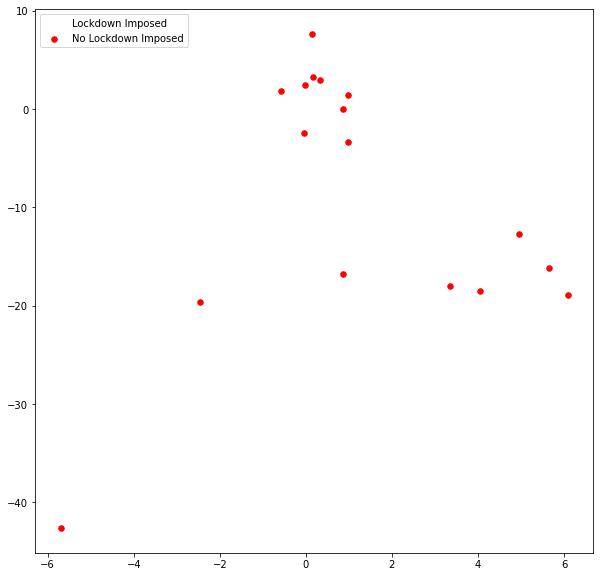

In [9]:
s = 30
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)

df_plot_lock    = df_temp[df_temp.locality_type == lock_lab]
df_plot_no_lock = df_temp[df_temp.locality_type == no_lock_lab]

ax1.scatter(df_plot_lock.internal_change,    df_plot_lock.external_change, color = df_plot_lock.poly_id, s=s, marker="s", label= lock_lab)
ax1.scatter(df_plot_no_lock.internal_change, df_plot_no_lock.external_change, s=s, c='r', marker="o", label= no_lock_lab)
plt.legend(loc='upper left');
plt.show()

Text(0.5, 1.0, 'Percental Movement Change from Pre-Lockdown to Lockdown \n (Lockdown: 2020-07-13 to 2020-07-23 )')

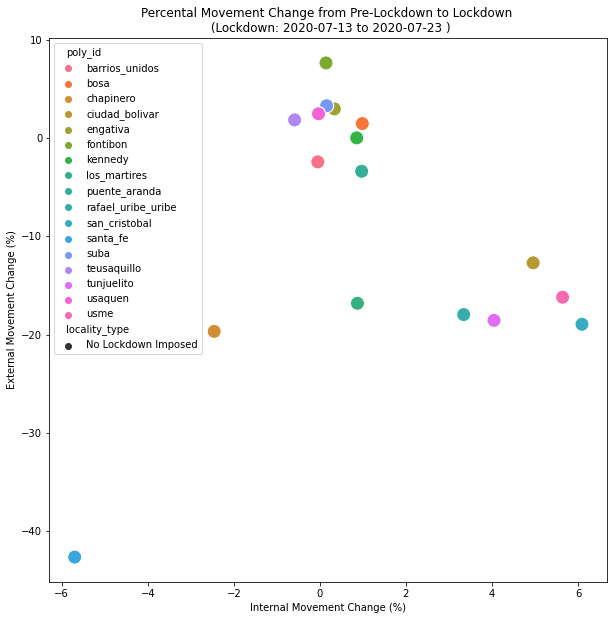

In [12]:
fig=plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data = df_temp, 
                x = "internal_change", 
                y = "external_change", 
                hue = "poly_id", 
                style = "locality_type",
                s = 200)

ax.set(xlabel='Internal Movement Change (%)', ylabel='External Movement Change (%)')
ax.set_title(f"Percental Movement Change from Pre-Lockdown to Lockdown \n (Lockdown: {lock['start_date']} to {lock['end_date']} )")